# Webinar 7: Accessing EOPF Zarr via openEO

`conda install openeo` 

In [1]:
import openeo
import rioxarray as rxr
import matplotlib.pyplot as plt

Connect to a openEO backend.

Connect to CDSE Backend.

In [2]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()
# connectoin to EODC Backend?

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=HIKZ-NDSA 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


Connect to EODC Backend.

In [2]:
connection = openeo.connect("https://openeo.eodc.eu/").authenticate_oidc()

Visit https://aai.egi.eu/device?user_code=BQNJ-XNJC 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


Specify the extents of the desired cube.

In [20]:
bbox = [9.51394272720868, 53.52777389917263, 9.856775345771272, 53.77590598108809] # munich
bbox = [9.669372670305636, 53.64026948239441, 9.701345402674315, 53.66341039786631] # 265 px northern germany
time_range = ['2025-05-01', '2025-06-01']
bands = ["B02"] 
bands = ['b02']

Load the datacube and calcutlate a monthly mean. Save the result.

In [21]:
url = "https://stac.core.eopf.eodc.eu/collections/sentinel-2-l2a" # eopf
# to do: eopf stac to safe!!!!!
# url = "https://stac.dataspace.copernicus.eu/v1/collections/sentinel-2-l2a/" # cdse

outname = "eopf_t_mean.tiff"
# outname = "cdse_t_mean.tiff"

cube = connection.load_stac(
    url=url,
    spatial_extent = {
        "west": bbox[0],
        "south": bbox[1],
        "east": bbox[2],
        "north": bbox[3],
    },
    temporal_extent=time_range,
    bands=bands,
)

cube_mnth = cube.reduce_dimension(dimension="t", reducer="mean")
res = cube_mnth.download(outname, format="GTiff")

The specified bands ['b02'] in `load_stac` are not a subset of the bands ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12'] found in the STAC metadata (unknown bands: ['b02']). Working with specified bands as is.


OpenEoApiError: [500] Error: No files to return from: /eodc/private/openeo/v1.0/job-result/7c5a1329-7d64-4576-b709-cb4ba8d59ba9/0b0538db-c9d4-4c67-af08-52299caff036/OPENEO/results

Load the datacube into the woring environment from the local storage.

In [10]:
data = rxr.open_rasterio("cdse_t_mean.tiff")
data

<xarray.DataArray (band: 1, y: 2783, x: 2294)> Size: 26MB
[6384202 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 18kB 5.339e+05 5.339e+05 ... 5.568e+05 5.568e+05
  * y            (y) float64 22kB 5.959e+06 5.959e+06 ... 5.931e+06 5.931e+06
    spatial_ref  int64 8B 0
Attributes:
    PROCESSING_SOFTWARE:  0.66.0a10
    AREA_OR_POINT:        Area
    _FillValue:           nan
    scale_factor:         1.0
    add_offset:           0.0
    long_name:            B02

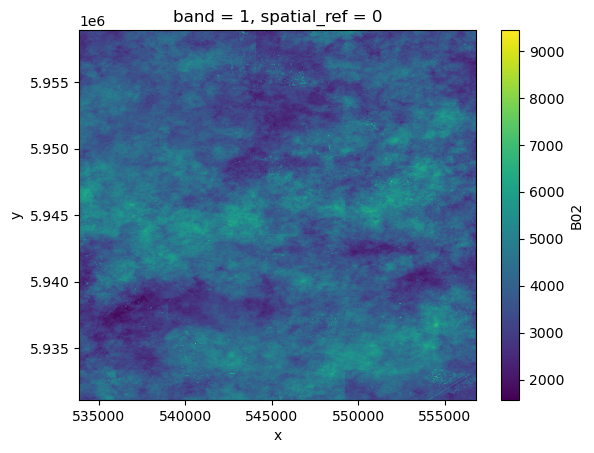

In [11]:
data.plot()